# Lab - 6

Name: Purusharth Malik
    
Registration No.: 2348542

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Plotting RGB images
def plot_image(img, title, og_im = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE), og_title="Original Image"):    
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(og_im, cmap='gray')
    plt.title(og_title)
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

### Applying the Median Filter (Built-in)

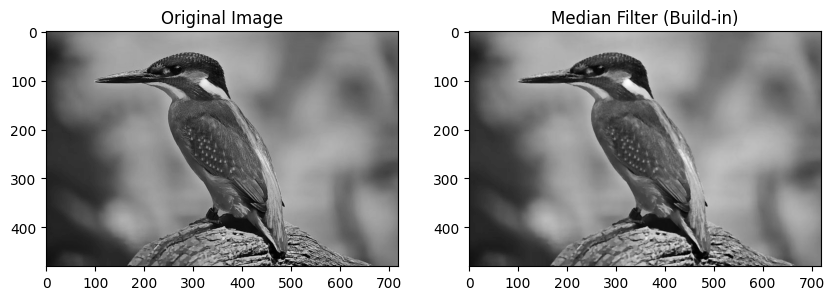

In [5]:
image = cv2.imread('bird_new.jpeg', cv2.IMREAD_GRAYSCALE)

img_median = cv2.medianBlur(image, 3)
plot_image(img_median, "Median Filter (Build-in)")

### Custom Median Filter

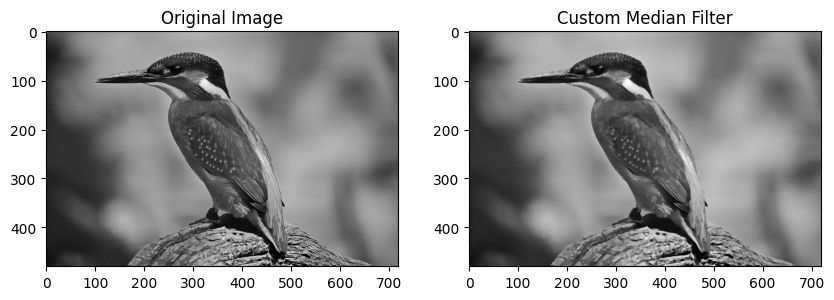

In [6]:
def median_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.median(neighbors)
    return result

img_median = median_filter_custom(image, kernel_size=3)
plot_image(img_median, "Custom Median Filter")

### Applying the Max Filter (Built-In)

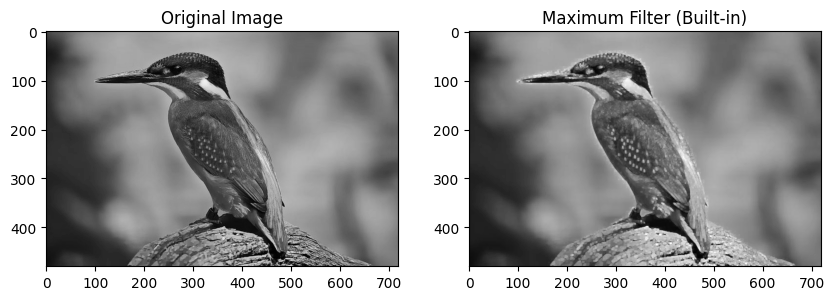

In [9]:
from scipy.ndimage import maximum_filter

img_max = maximum_filter(image, size=3)
plot_image(img_max, "Maximum Filter (Built-in)")

### Custom Max Filter

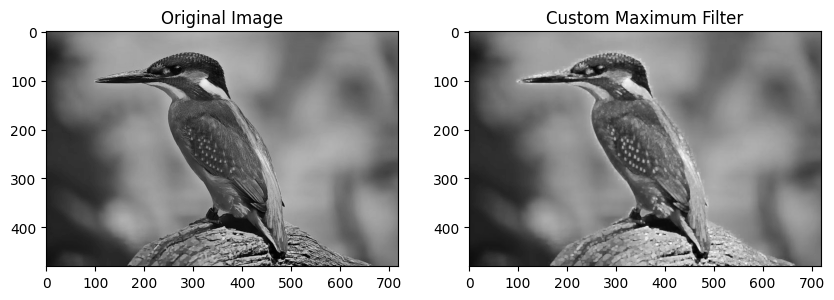

In [10]:
def max_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.max(neighbors)
    return result

img_max = max_filter_custom(image, kernel_size=3)
plot_image(img_max, "Custom Maximum Filter")

### Applying Minimum Filter (Built-In)

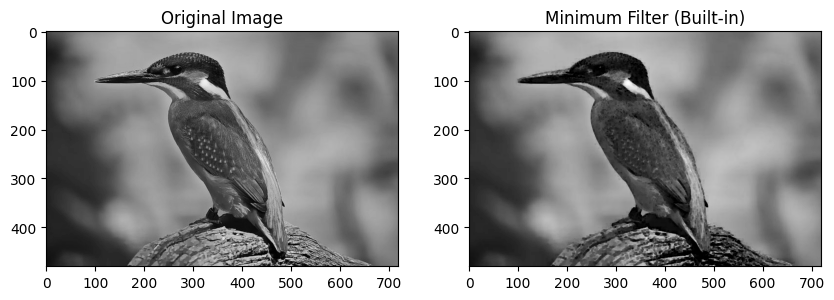

In [11]:
from scipy.ndimage import minimum_filter

img_min = minimum_filter(image, size=3)
plot_image(img_min, "Minimum Filter (Built-in)")

### Custom Minimum Filter

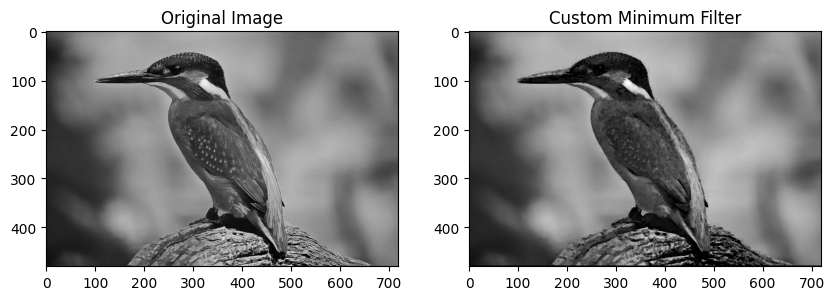

In [12]:
def min_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.min(neighbors)
    return result

img_min = min_filter_custom(image, kernel_size=3)
plot_image(img_min, "Custom Minimum Filter")

### Applying Midpoint Filter (Built-In)

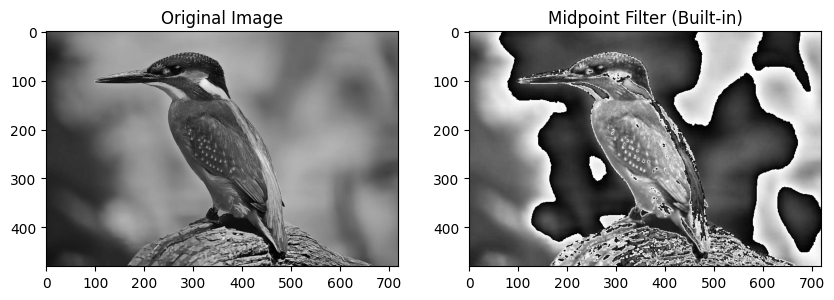

In [14]:
def midpoint_filter(image, kernel_size):
    max_filtered = maximum_filter(image, kernel_size)
    min_filtered = minimum_filter(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result

img_mid = midpoint_filter(image, kernel_size=3)
plot_image(img_mid, "Midpoint Filter (Built-in)")

### Custom Midpoint Filter

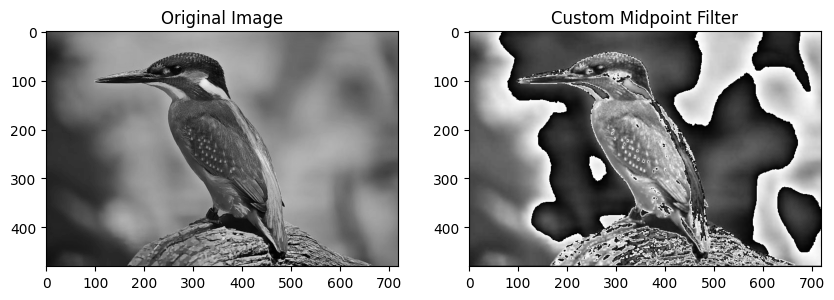

In [15]:
def midpoint_filter(image, kernel_size):
    max_filtered = max_filter_custom(image, kernel_size)
    min_filtered = min_filter_custom(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result

img_mid = midpoint_filter(image, kernel_size=3)
plot_image(img_mid, "Custom Midpoint Filter")

### Applying Alpha Trimmed Filter (Built-In)

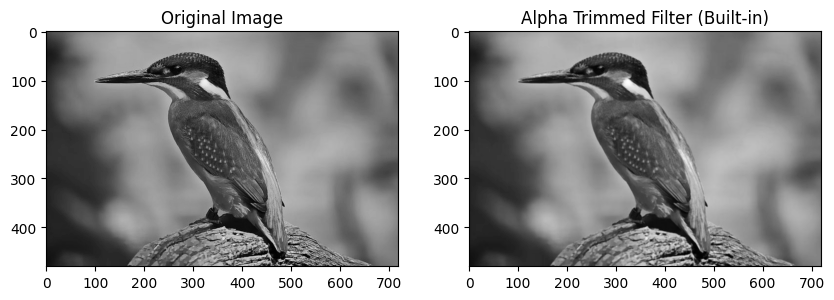

In [17]:
from scipy.ndimage import generic_filter

def alpha_trimmed_filter(image, kernel_size, alpha):
    def alpha_trimmed_mean(data):
        sorted_data = np.sort(data)
        trimmed_data = sorted_data[alpha:-alpha]
        return np.mean(trimmed_data)
    result = generic_filter(image, alpha_trimmed_mean, size=kernel_size)
    return result

img_alpha = alpha_trimmed_filter(image, kernel_size=3, alpha=1)
plot_image(img_alpha, "Alpha Trimmed Filter (Built-in)")

### Custom Alpha Trimmed Filter

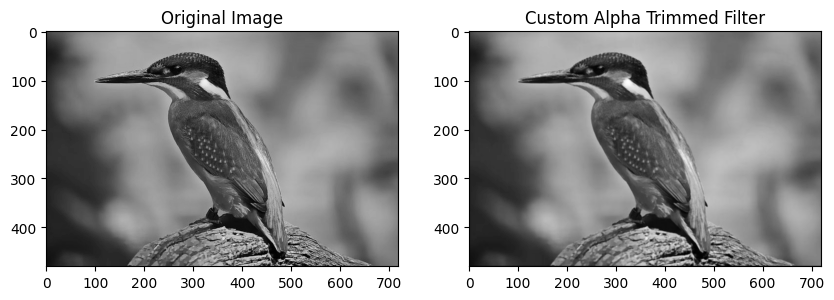

In [18]:
def alpha_trimmed_filter(image, kernel_size, alpha):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            neighbors = np.sort(neighbors)
            trimmed_neighbors = neighbors[alpha:-alpha]
            result[i, j] = np.mean(trimmed_neighbors)
    return result

img_alpha = alpha_trimmed_filter(image, kernel_size=3, alpha=1)
plot_image(img_alpha, "Custom Alpha Trimmed Filter")

### Removing Salt Noise using all the filters

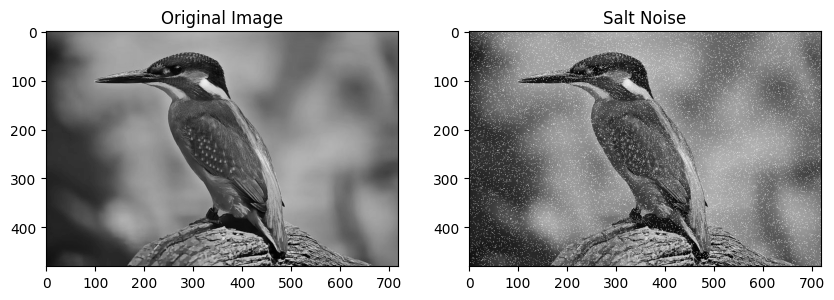

In [36]:
from skimage.util import random_noise

# Adding salt noise the the image
img_salt = random_noise(image, mode='salt')
img_salt = (255 * img_salt).astype(np.uint8)

plot_image(img_salt, "Salt Noise")

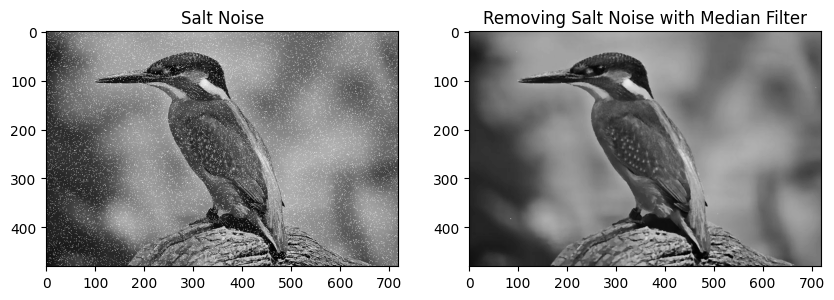

In [37]:
plot_image(median_filter_custom(img_salt, kernel_size=3), "Removing Salt Noise with Median Filter", og_im=img_salt, og_title="Salt Noise")

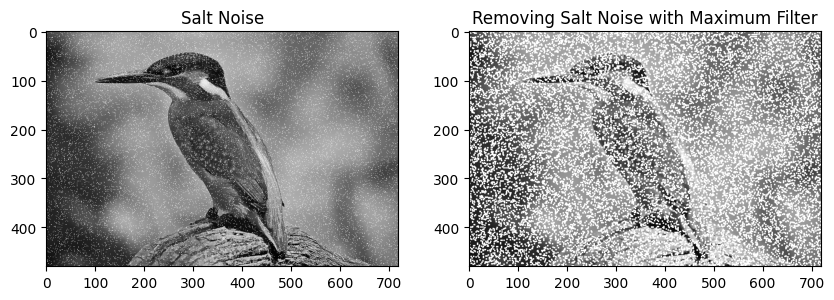

In [28]:
plot_image(max_filter_custom(img_salt, kernel_size=3), "Removing Salt Noise with Maximum Filter", og_im=img_salt, og_title="Salt Noise")

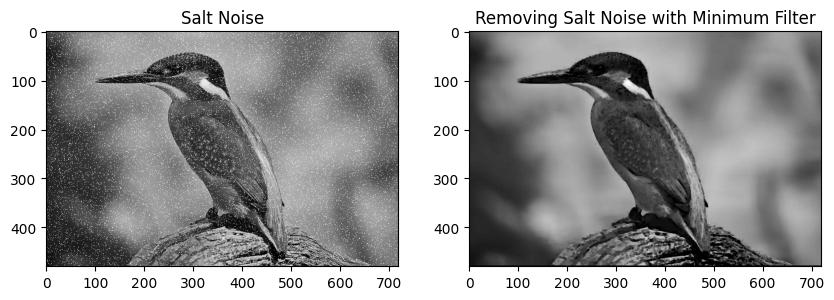

In [29]:
plot_image(min_filter_custom(img_salt, kernel_size=3), "Removing Salt Noise with Minimum Filter", og_im=img_salt, og_title="Salt Noise")

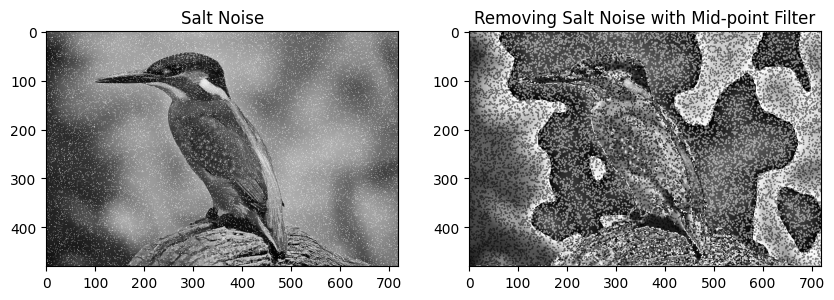

In [31]:
plot_image(midpoint_filter(img_salt, kernel_size=3), "Removing Salt Noise with Mid-point Filter", og_im=img_salt, og_title="Salt Noise")

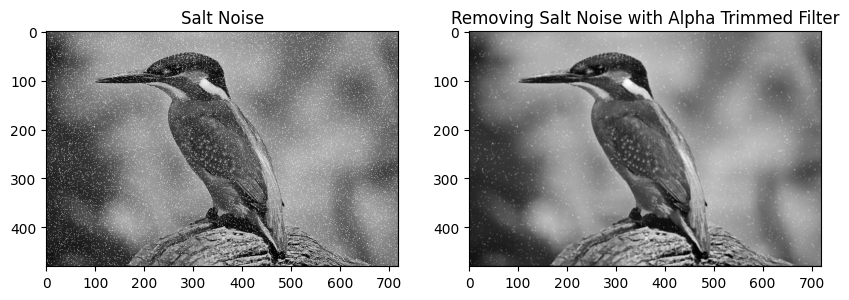

In [33]:
plot_image(alpha_trimmed_filter(img_salt, kernel_size=3, alpha=1), "Removing Salt Noise with Alpha Trimmed Filter", og_im=img_salt, og_title="Salt Noise")

<b> Median and minimum filters are most suitable for removing salt noise. </b>

### Removing Pepper Noise using all the filters

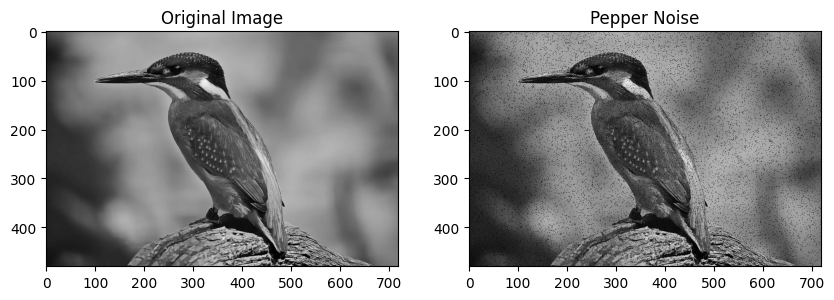

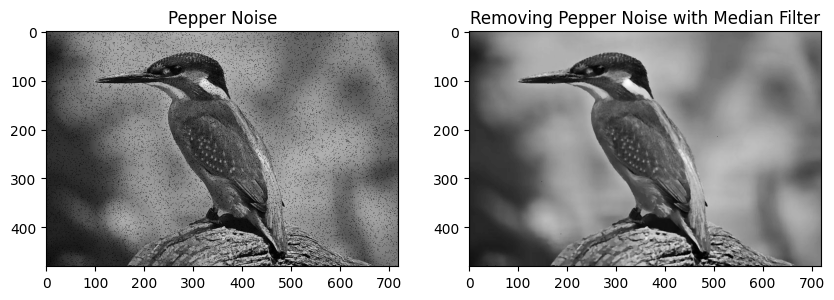

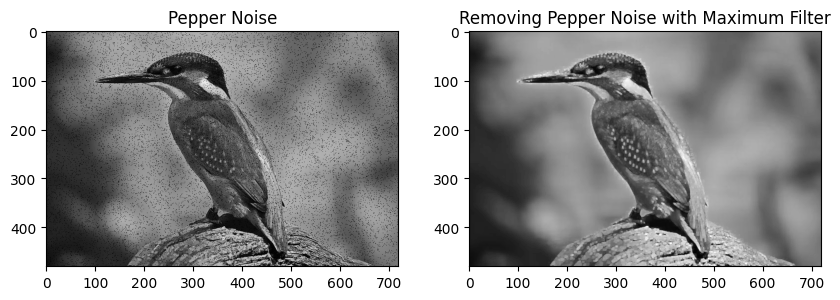

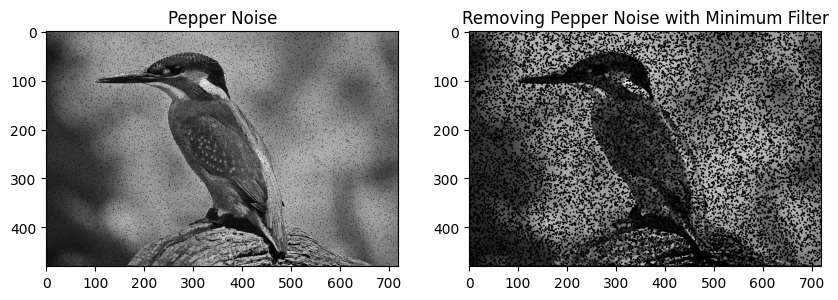

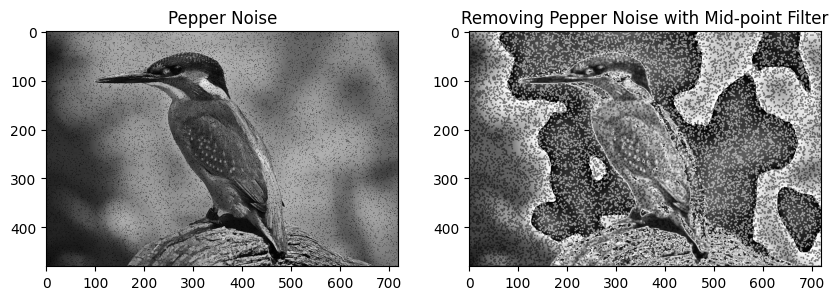

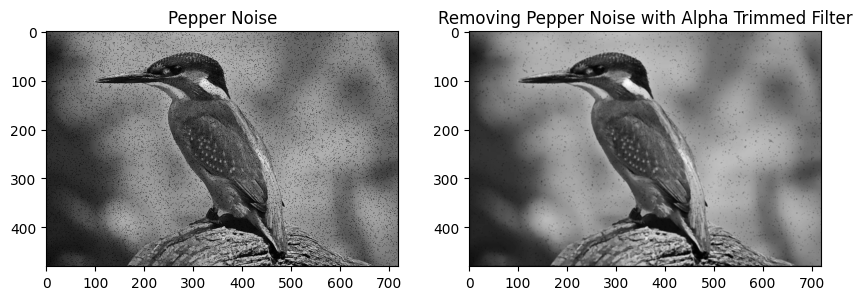

In [43]:
# Adding pepper noise to the image
img_pepper = random_noise(image, mode='pepper')
img_pepper = (255 * img_pepper).astype(np.uint8)

plot_image(img_pepper, "Pepper Noise")

plot_image(median_filter_custom(img_pepper, kernel_size=3), "Removing Pepper Noise with Median Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(max_filter_custom(img_pepper, kernel_size=3), "Removing Pepper Noise with Maximum Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(min_filter_custom(img_pepper, kernel_size=3), "Removing Pepper Noise with Minimum Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(midpoint_filter(img_pepper, kernel_size=3), "Removing Pepper Noise with Mid-point Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(alpha_trimmed_filter(img_pepper, kernel_size=3, alpha=1), "Removing Pepper Noise with Alpha Trimmed Filter", og_im=img_pepper, og_title="Pepper Noise")

<b> Median and maximum filters are most suitable for removing pepper noise. </b>

### Removing Salt & Pepper Noise using all the filters

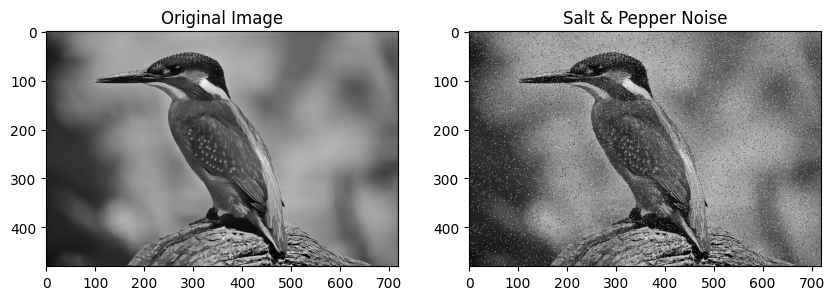

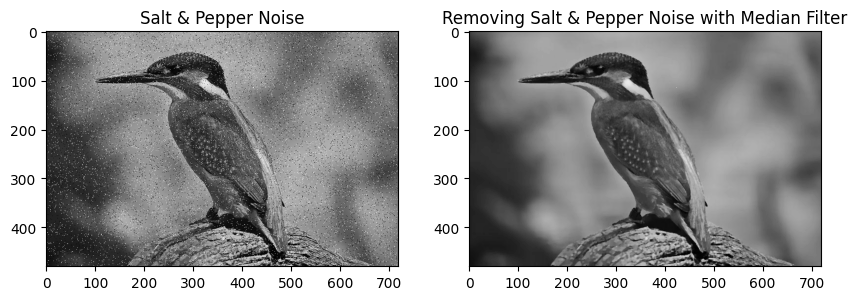

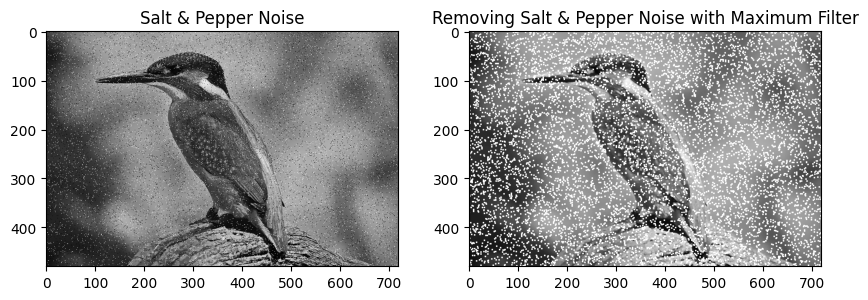

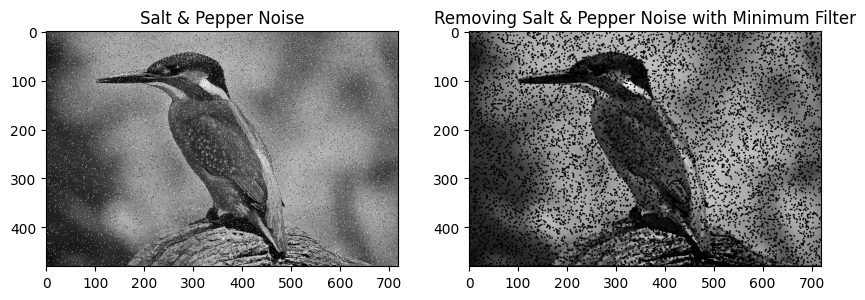

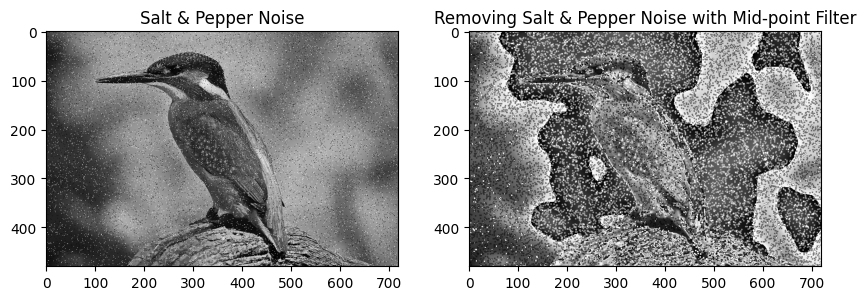

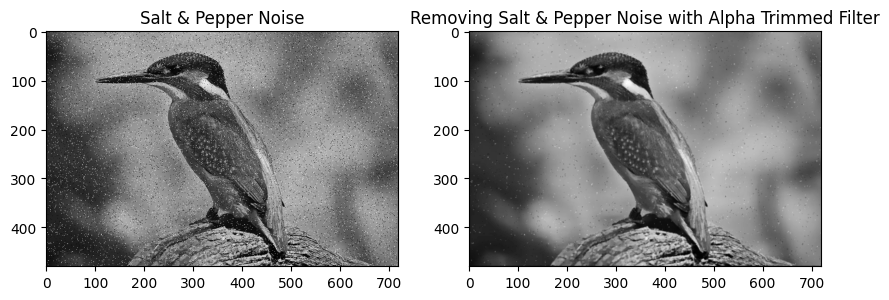

In [41]:
# Adding salt and pepper noise to the image
img_sp = random_noise(image, mode='s&p')
img_sp = (255 * img_sp).astype(np.uint8)

plot_image(img_sp, "Salt & Pepper Noise")

plot_image(median_filter_custom(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Median Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(max_filter_custom(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Maximum Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(min_filter_custom(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Minimum Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(midpoint_filter(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Mid-point Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(alpha_trimmed_filter(img_sp, kernel_size=3, alpha=1), "Removing Salt & Pepper Noise with Alpha Trimmed Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

<b> Only median filter is able to remove salt and pepper noise. </b>

# End